In [1]:
import csv
import os
import sys
import json
import re
import time
import datetime  
import pandas as pd  

In [2]:
# Load reviews and salon_list from csv files using pandas

reviews = pd.read_csv('./scrapped_reviews/reviews.csv')
salon_list = pd.read_csv("./scrapped_reviews/salon_list.csv")

In [4]:

reviews = reviews[["place_name", "review_text", "rating", "published_at_date"]]
reviews = reviews.head(30)
reviews.to_csv('./scrapped_reviews/reviews_selected_small.csv', index=False)

In [3]:
reviews.head(1)

,place_id,place_name,review_id,rating,review_text,published_at_date,response_from_owner_text,response_from_owner_date,review_likes_count,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
0,ChIJf6de11oHzkwRlKcXSOTLn6Q,Curly Hair Designs,ChdDSUhNMG9nS0VJQ0FnSUN6NGJ1SXhnRRAB,5,NaN,02/06/2024 19:12,Thank you Missy!!,12:42.3,0,5.0,NaN,False


In [5]:
# get "review_text" and 'rating' column from reviews
reviews = reviews[['review_text', 'rating']]
reviews = reviews.dropna()
reviews.head(3)

,review_text,rating
1,I ve been a client of Curly Hair Designs since...,5
2,Pure awesomeness!!! Will return for sure!!! Rh...,5
3,We just had the most wonderful experience at C...,5


In [6]:
# display a distribution of review lengths
# use blue for rating 3,4,5 and red for rating 1,2
reviews['review_length'] = reviews['review_text'].apply(len)
reviews['rating'] = reviews['rating'].astype(int)
reviews['sentiment'] = reviews['rating'].apply(lambda x: 'positive' if x > 4 else 'negative')
reviews['sentiment'] = reviews['sentiment'].astype('category')
reviews.head(3)

,review_text,rating,review_length,sentiment
1,I ve been a client of Curly Hair Designs since...,5,106,positive
2,Pure awesomeness!!! Will return for sure!!! Rh...,5,84,positive
3,We just had the most wonderful experience at C...,5,981,positive


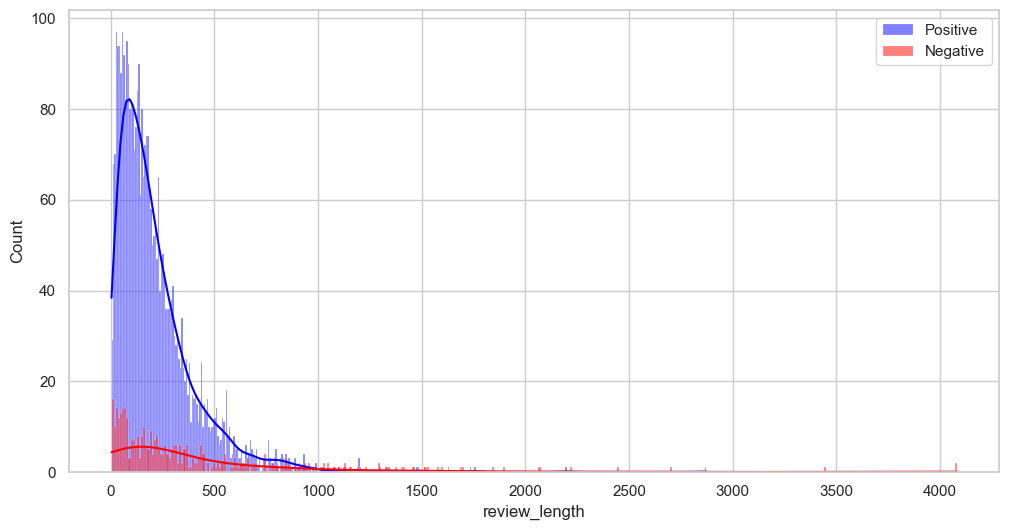

In [7]:
# display a distribution of review lengths
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(
    reviews[reviews["sentiment"] == "positive"]["review_length"],
    kde=True,
    color="blue",
    label="Positive",
    bins=400,
)
sns.histplot(
    reviews[reviews["sentiment"] == "negative"]["review_length"],
    kde=True,
    color="red",
    label="Negative",
    bins=400,
)
plt.legend()
plt.show()

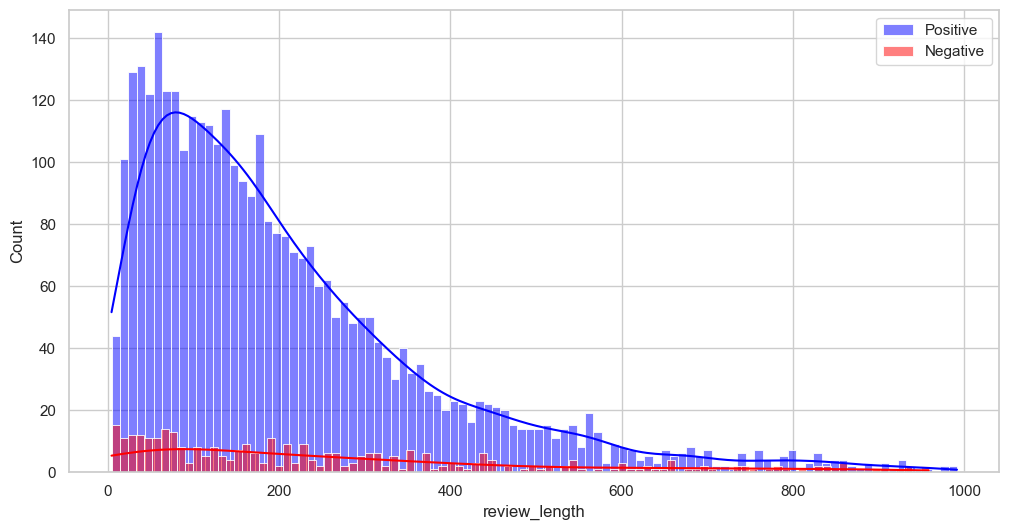

In [8]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(
    reviews[(reviews["review_length"] < 1000) & (reviews["sentiment"] == "positive")][
        "review_length"
    ],
    kde=True,
    color="blue",
    label="Positive",
    bins=100,
)
sns.histplot(
    reviews[(reviews["review_length"] < 1000) & (reviews["sentiment"] == "negative")][
        "review_length"
    ],
    kde=True,
    color="red",
    label="Negative",
    bins=100,
)
plt.legend()
plt.show()

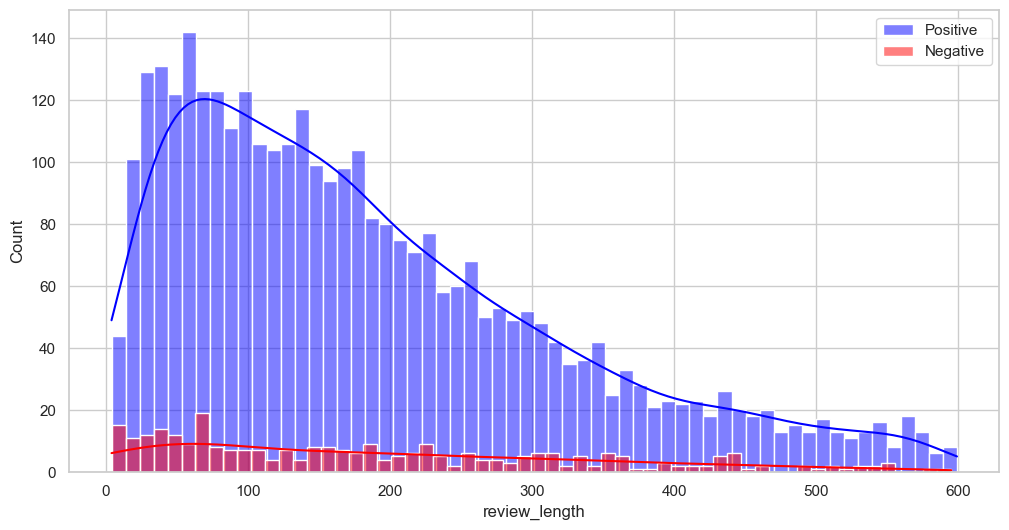

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(
    reviews[(reviews["review_length"] < 600) & (reviews["sentiment"] == "positive")][
        "review_length"
    ],
    kde=True,
    color="blue",
    label="Positive",
    bins=60,
)
sns.histplot(
    reviews[(reviews["review_length"] < 600) & (reviews["sentiment"] == "negative")][
        "review_length"
    ],
    kde=True,
    color="red",
    label="Negative",
    bins=60,
)
plt.legend()
plt.show()

In [15]:
# show reviews with length less than 50
# show the full value of review
# show all rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
reviews[
    (reviews["review_length"] > 300)
    & (reviews["review_length"] < 310)
    & (reviews["sentiment"] == "negative")
].head(10)

,review_text,rating,review_length,sentiment
166,These ppl charged me $100 for just a wash and blow dry. Mind you I was quoted $35+ on the phone. Why on earth would you not tell your client of the price spike? I have 3B curly hair and have never in my life been charged so much. Do NOT go to them they are scammers and they didn t even do a good job!,1,301,negative
661,"Reasonably priced no-frills salon in suburban shopping mall. Clean, friendly staff. UPDATE 2023: They have moved from the dingy old mall location to an renovated bungalow not far away. Shiny new premises; same old high quality service! There is a 2% charge for credit cards, so pay by cash or debit...",4,301,negative
1398,"Very deceiving, I asked Sarinya for a natural balayage on my untouched light brown hair and got this. She asked me to come back to blend the separation but the toner she chose reacted on the recently bleached hair AND on my natural hair, resulting in now three different tones. FYI - I paid 400$ for this",1,304,negative
2498,Cost me $35.05 for a mans haircut. I didnt ask but its hard to imagine how this could possibly be justified. I give the man himself 5 stars for the haircut. I give the owner of the shop 1star for being extremely over priced. I would never return because of this. Too bad to because i like the hair cut,1,301,negative
2499,I went there and got a good hair cut for 35 bucks so my woman gose there to get her hair done thinking it would be the same price for hair cut and ahe got less har cut off then i did and she had to pay 65 bucks because she is a woman like how dose that make any sense she has to pay 30 more cuz she is a woman,1,309,negative
4450,The only reason I went is because my barber cancelled last minute and I used to get my hair done at the Dalhousie location.. this location completely butchered my hair and then offered no compensation. Ran all over town to find someone who could fix my hair.. Very disappointing. I Will not be going back.,1,305,negative


In [11]:
# Decide the filter condition for review to generate test conversation data